In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [2]:
## Reading the data in
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")

# take a look at the dataset
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
tests = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")

In [5]:
cases = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")

In [6]:
vaccine =pd.read_csv("../input/covid19-in-india/covid_vaccine_statewise.csv")

In [7]:
tests.head(2)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0


In [8]:
vaccine.head(2)

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0


In [9]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15113 entries, 0 to 15112
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15113 non-null  object 
 1   State         15113 non-null  object 
 2   TotalSamples  15113 non-null  float64
 3   Negative      6657 non-null   object 
 4   Positive      5589 non-null   float64
dtypes: float64(2), object(3)
memory usage: 590.5+ KB


In [10]:
state_positive = tests.groupby(["State"]).Positive.sum()

<AxesSubplot:ylabel='Frequency'>

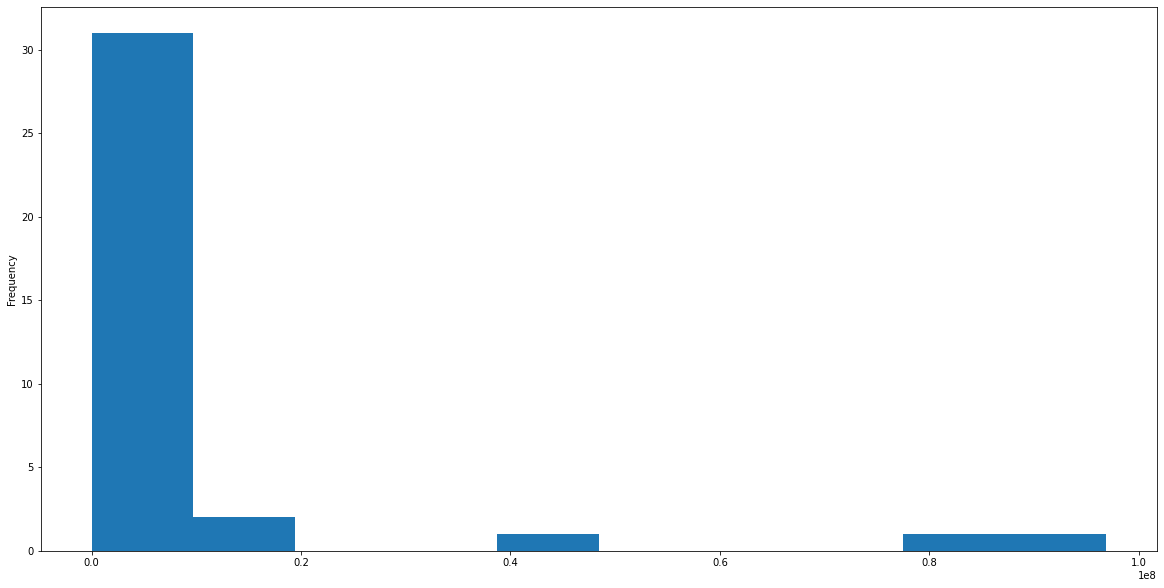

In [11]:
state_positive.plot(kind= "hist", figsize = (20,10))

In [12]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [13]:
cases.describe()

,Sno,Cured,Deaths,Confirmed
count,16850.000000,1.685000e+04,16850.000000,1.685000e+04
mean,8425.500000,2.360353e+05,3485.222552,2.583667e+05
std,4864.320353,5.225438e+05,9330.541749,5.672808e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4213.250000,2.658500e+03,22.000000,3.644750e+03
50%,8425.500000,2.889500e+04,453.000000,3.336150e+04
75%,12637.750000,2.537510e+05,3071.250000,2.666530e+05
max,16850.000000,5.872268e+06,123531.000000,6.113335e+06


In [14]:
cases.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1


In [15]:
cases["Active"] = cases.Confirmed - (cases.Cured+cases.Deaths)

In [16]:
cases.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1


In [17]:
cases.Active.sum()

317557938

In [18]:
cases.Deaths.sum()

58726000

In [19]:
cases.Cured.sum()

3977194136

In [20]:
cases.Confirmed.sum()

4353478074

In [21]:
cases.rename(columns={"State/UnionTerritory":"State"},inplace=True)

In [22]:
cases.head(2)

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1


In [23]:
Deaths_Statewise= cases.groupby("State").Deaths.max().sort_values()

Text(0, 0.5, 'No.of Deaths')

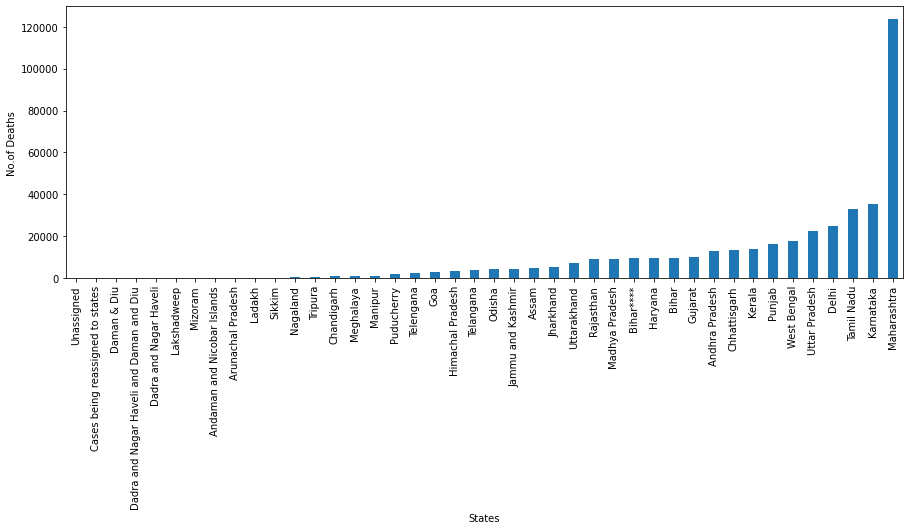

In [24]:
Deaths_Statewise.plot(kind="bar",figsize=(15,5))
plt.xlabel("States")
plt.ylabel("No.of Deaths")

In [25]:
Active_Statewise = cases.groupby("State").Active.max().sort_values()

<AxesSubplot:xlabel='State'>

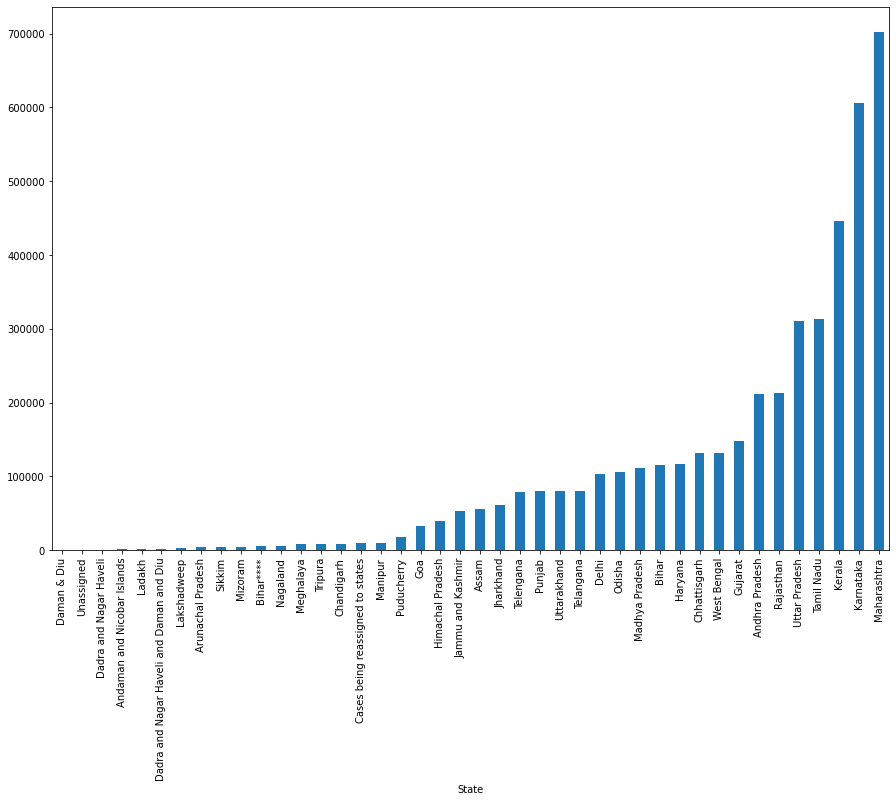

In [26]:
Active_Statewise.plot(kind="bar",figsize=(15,10))

In [27]:
Cured_Statewise= cases.groupby("State").Cured.max().sort_values()


<AxesSubplot:xlabel='State'>

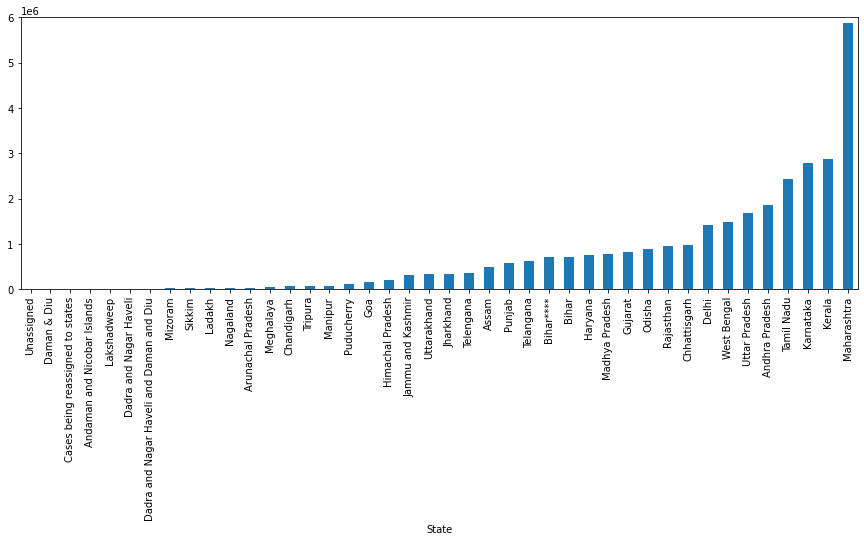

In [28]:
Cured_Statewise.plot(kind="bar",figsize=(15,5),ylim=(0,6000000))

In [29]:
cases.Date = pd.to_datetime(cases.Date, dayfirst=True)

In [30]:
cases.Date.max()

Timestamp('2021-07-07 00:00:00')

In [31]:
firstwave = cases.set_index("Date").loc["2020-02-28" : "2020-12-30" ]

In [32]:
Secondwave = cases.set_index("Date").loc["2020-12-30" : "2021-6-30" ]

In [33]:
firstwave.head()

,Sno,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
Date,,,,,,,,,
2020-02-28,30,6:00 PM,Kerala,3,0,0,0,3,3
2020-02-29,31,6:00 PM,Kerala,3,0,0,0,3,3
2020-03-01,32,6:00 PM,Kerala,3,0,0,0,3,3
2020-03-02,33,6:00 PM,Telengana,1,0,0,0,1,1
2020-03-02,34,6:00 PM,Kerala,3,0,0,0,3,3


In [34]:
firstwave.drop(["ConfirmedIndianNational","ConfirmedForeignNational","Time"], axis=1)

,Sno,State,Cured,Deaths,Confirmed,Active
Date,,,,,,
2020-02-28,30,Kerala,0,0,3,3
2020-02-29,31,Kerala,0,0,3,3
2020-03-01,32,Kerala,0,0,3,3
2020-03-02,33,Telengana,0,0,1,1
2020-03-02,34,Kerala,0,0,3,3
...,...,...,...,...,...,...
2020-12-30,10042,Telengana,278523,1538,285939,5878
2020-12-30,10043,Tripura,32735,385,33258,138
2020-12-30,10044,Uttarakhand,83416,1495,90167,5256


<AxesSubplot:xlabel='State'>

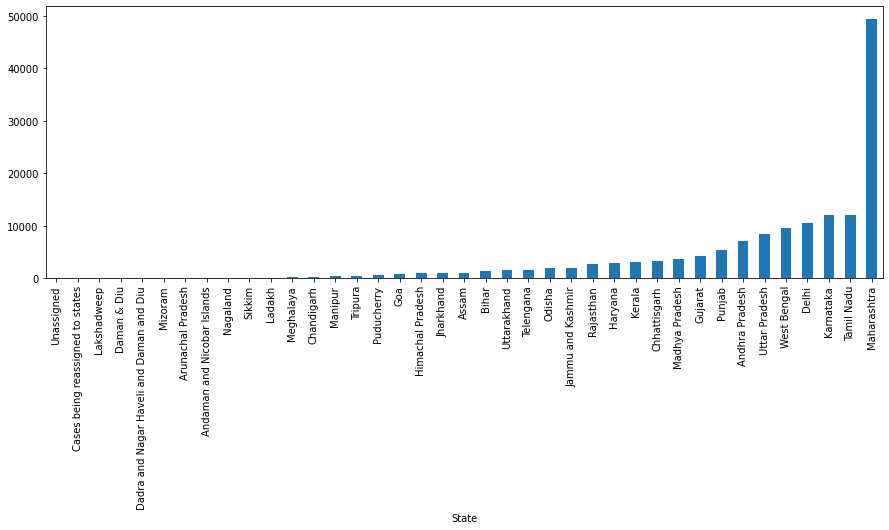

In [35]:
firstwave.groupby("State").Deaths.max().sort_values().plot(kind="bar",figsize=(15,5))

In [36]:
firstwave.Deaths.max()

49373

<AxesSubplot:xlabel='State'>

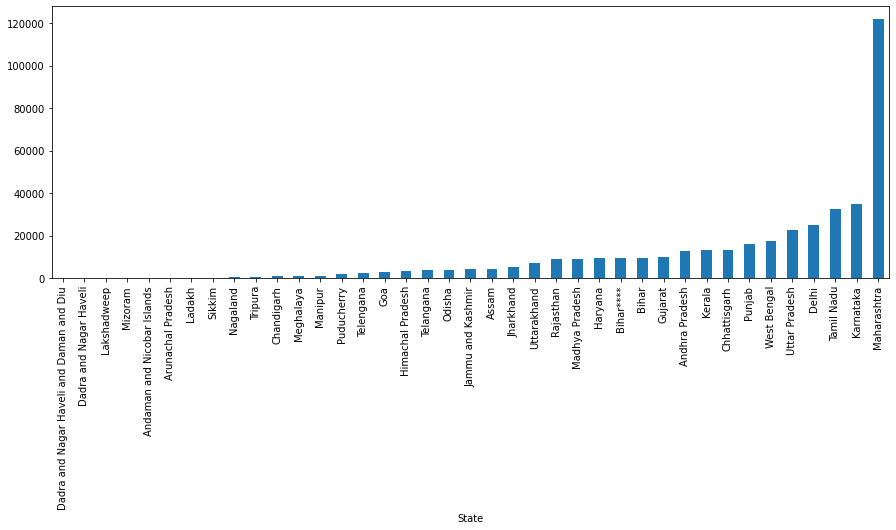

In [37]:
Secondwave.groupby("State").Deaths.max().sort_values().plot(kind="bar",figsize=(15,5))

In [38]:
Secondwave.Deaths.max()

121804

In [39]:
firstwave.Confirmed.max()

1925066

In [40]:
Secondwave.Confirmed.max()

6051633

<AxesSubplot:xlabel='State'>

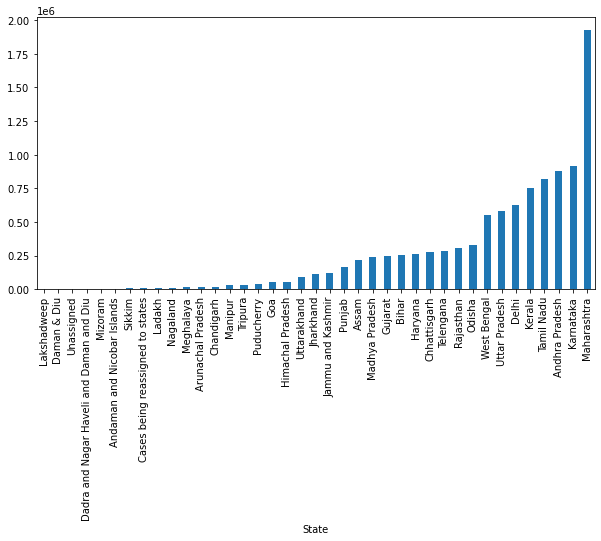

In [41]:
firstwave.groupby("State").Confirmed.max().sort_values().plot(kind="bar",figsize=(10,5))

In [42]:
tests.head(2)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0


<AxesSubplot:xlabel='State'>

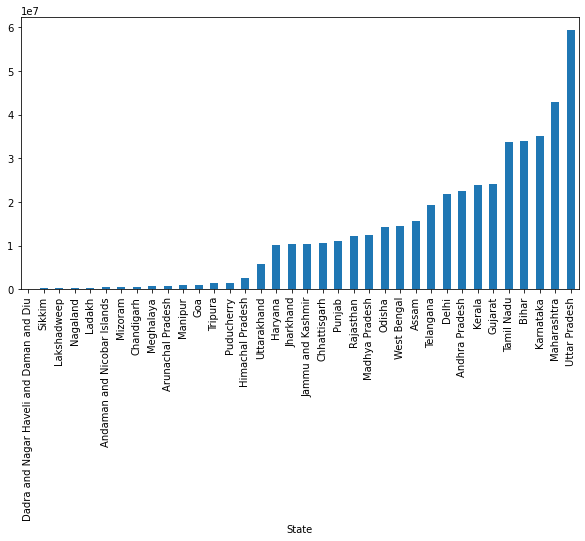

In [43]:
tests.groupby("State").TotalSamples.max().sort_values().plot(kind="bar", figsize=(10,5))